In [84]:
import os

import matplotlib.pyplot as plt
import pandas as pd

from app.utils.universal_path import universal_path

plots_output_path = universal_path('../../../images')
user_ratings_path = universal_path('../../data/cleaned/user_ratings.csv')
user_ratings = pd.read_csv(user_ratings_path)
subcategories_path = universal_path('../../data/cleaned/subcategories.csv')
subcategories = pd.read_csv(subcategories_path)

In [92]:
num_ratings = len(user_ratings)
print(f'Number of ratings: {num_ratings}')

num_users = len(user_ratings["Username"].unique())
print(f'Number of users: {num_users}')

num_games = len(user_ratings["BGGId"].unique())
print(f'Number of games: {num_games}')

print(f'Number of subcategories: {len(subcategories.columns[1:])}')

games_without_category = subcategories[subcategories[subcategories.columns[1:]].sum(axis=1) == 0]

num_games_without_category = len(games_without_category)
games_without_category_percent = num_games_without_category / len(subcategories) * 100
print(
    f'Number of games without subcategory: {num_games_without_category} ({games_without_category_percent:.2f}%)')

num_games_with_category = len(subcategories) - num_games_without_category
games_with_category_percent = num_games_with_category / len(subcategories) * 100
print(f'Number of games with subcategory: {num_games_with_category} ({games_with_category_percent:.2f}%)')

print(
    f'Density of user ratings matrix: {len(user_ratings) / (num_users * num_games) * 100:.2f}%')

print(f'Average number of ratings per user: {num_ratings / num_users:.2f}')

print('Median number of ratings per user: '
      f'{user_ratings["Username"].value_counts().median()}')

print(f'Maximum number of ratings per user: {user_ratings["Username"].value_counts().max()}')

print(f'Average rating: {user_ratings["Rating"].mean():.2f}')

Number of ratings: 18340284
Number of users: 224557
Number of games: 21919
Number of subcategories: 10
Number of games without subcategory: 11889 (54.24%)
Number of games with subcategory: 10030 (45.76%)
Density of user ratings matrix: 0.37%
Average number of ratings per user: 81.67
Median number of ratings per user: 39.0
Maximum number of ratings per user: 6478
Average rating: 7.10


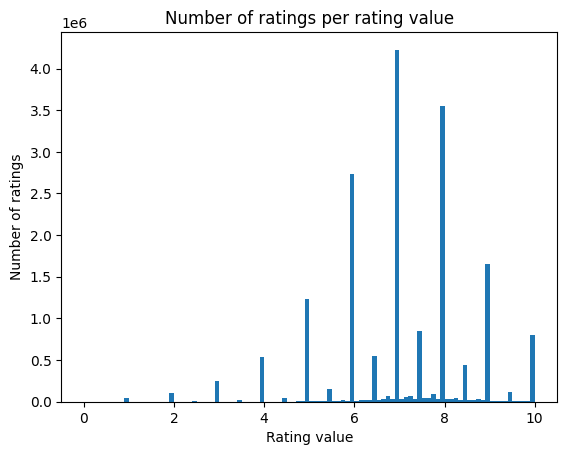

<Figure size 640x480 with 0 Axes>

In [86]:
# Number of ratings per rating value histogram

plt.hist(user_ratings['Rating'], bins=100)
plt.xlabel("Rating value")
plt.ylabel("Number of ratings")
plt.title("Number of ratings per rating value")
plt.show()

# save histogram
plt.savefig(os.path.join(plots_output_path, 'number_of_ratings_per_rating_value_histogram.png'))

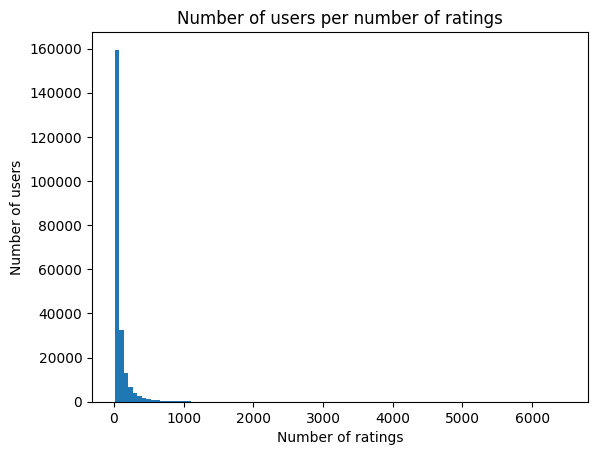

<Figure size 640x480 with 0 Axes>

In [87]:
# Number of users per number of ratings histogram

plt.hist(user_ratings['Username'].value_counts(), bins=100)
plt.xlabel("Number of ratings")
plt.ylabel("Number of users")
plt.title("Number of users per number of ratings")
plt.show()

# save histogram
plt.savefig(os.path.join(plots_output_path, 'number_of_users_per_number_of_ratings_histogram.png'))

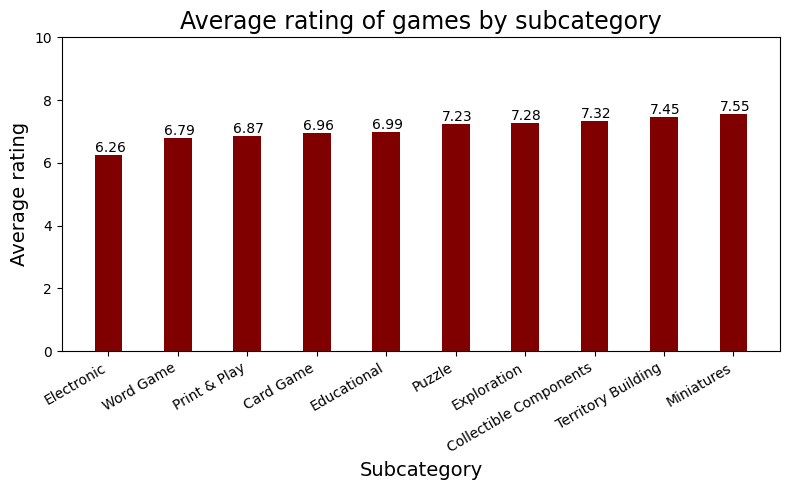

<Figure size 640x480 with 0 Axes>

In [81]:
# Average rating of games per subcategory bar plot

user_ratings_joined_with_subcategory = user_ratings.merge(subcategories, on='BGGId')

avg_ratings_per_subcategory = {
    subcategory: user_ratings_joined_with_subcategory[user_ratings_joined_with_subcategory[subcategory] == 1][
        'Rating'].mean()
    for subcategory in subcategories.columns[1:]
}

avg_ratings_per_subcategory_sorted = dict(sorted(avg_ratings_per_subcategory.items(), key=lambda x: x[1]))

average_ratings = avg_ratings_per_subcategory_sorted.values()

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(avg_ratings_per_subcategory_sorted.keys(), average_ratings, color='maroon', width=0.4)
plt.xlabel("Subcategory", size=14)
plt.ylabel("Average rating", size=14)
plt.xticks(rotation=30, ha='right')
plt.title("Average rating of games by subcategory", size=17)
plt.ylim(0, 10)
plt.tight_layout()

for index, rating in enumerate(average_ratings):
    plt.text(x=index - 0.2, y=rating + 0.1, s=round(rating, 2), fontdict=dict(fontsize=10))

plt.show()

# save bar plot
plt.savefig(os.path.join(plots_output_path, 'average_rating_of_games_by_subcategory_bar_plot.png'))

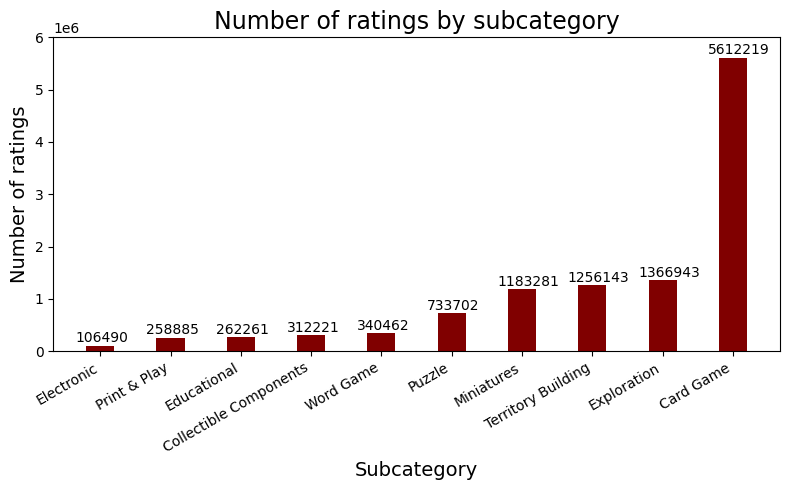

<Figure size 640x480 with 0 Axes>

In [71]:
# Number of ratings per subcategory bar plot

num_ratings_per_subcategory = {
    subcategory: len(user_ratings_joined_with_subcategory[user_ratings_joined_with_subcategory[subcategory] == 1])
    for subcategory in subcategories.columns[1:]
}

num_ratings_per_subcategory_sorted = dict(sorted(num_ratings_per_subcategory.items(), key=lambda x: x[1]))

nums_ratings = num_ratings_per_subcategory_sorted.values()

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(num_ratings_per_subcategory_sorted.keys(), nums_ratings, color='maroon', width=0.4)
plt.xlabel("Subcategory", size=14)
plt.ylabel("Number of ratings", size=14)
plt.xticks(rotation=30, ha='right')
plt.ylim(0, 6_000_000)
plt.title("Number of ratings by subcategory", size=17)
plt.tight_layout()

for index, num_ratings in enumerate(nums_ratings):
    plt.text(x=index - 0.35, y=num_ratings + 60000, s=num_ratings, fontdict=dict(fontsize=10))

plt.show()

# save bar plot
plt.savefig(os.path.join(plots_output_path, 'number_of_ratings_by_subcategory_bar_plot.png'))

Number of ratings: 18340284
Number of games: 21919
Density of user ratings matrix: 0.37%
